In [2]:
%pip install pandas numpy matplotlib seaborn --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 599.7 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 355.2 kB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 582.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 277.9 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 183.0 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 360.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 439.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 615.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.8 kB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 562.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━

# Superstore Dataset Analysis

Notebook ini berisi analisis dan visualisasi data Superstore dari Kaggle.

Outline:
1. Import Library
2. Load Dataset
3. Eksplorasi Data
4. Data Cleaning & Preprocessing
5. Analisis Dasar
6. Visualisasi Penjualan per Kategori
7. Visualisasi Tren Profit
8. Analisis Rating & Penjualan sesuai LKM

In [3]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# 2. Load Superstore Dataset
# File sudah didownload dengan kagglehub
try:
    df = pd.read_csv('../data/Sample - Superstore.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('../data/Sample - Superstore.csv', encoding='latin-1')
    
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# 3. Explore Dataset Structure
print('Columns:', df.columns)
df.info()
df.describe()

Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 1

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# 4. Data Cleaning and Preprocessing
# Cek missing values
df.isnull().sum()
# Hapus duplikat
df = df.drop_duplicates()
# Konversi tipe data jika perlu
# Contoh: df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
# 5. Basic Data Analysis (Sales, Profit, Orders)
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
print(f'Total Sales: {total_sales}')
print(f'Total Profit: {total_profit}')
print(f'Total Orders: {total_orders}')

Total Sales: 2297200.8603
Total Profit: 286397.0217
Total Orders: 5009


/tmp/ipykernel_6837/1042946638.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)


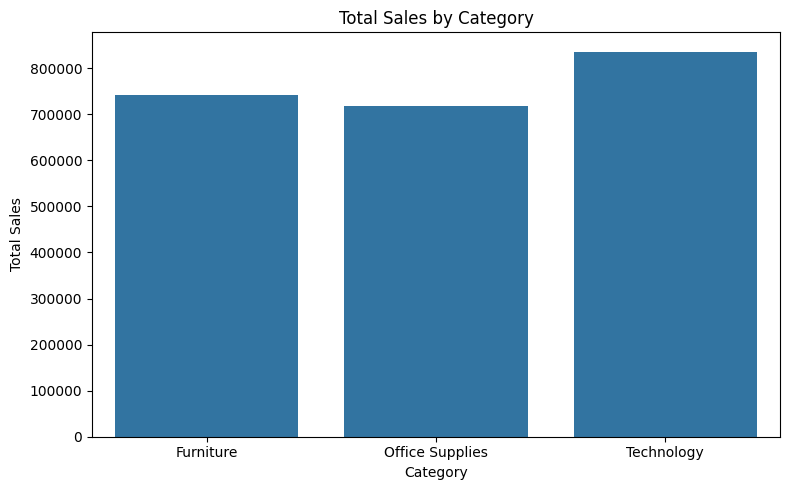

In [9]:
# 6. Visualize Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

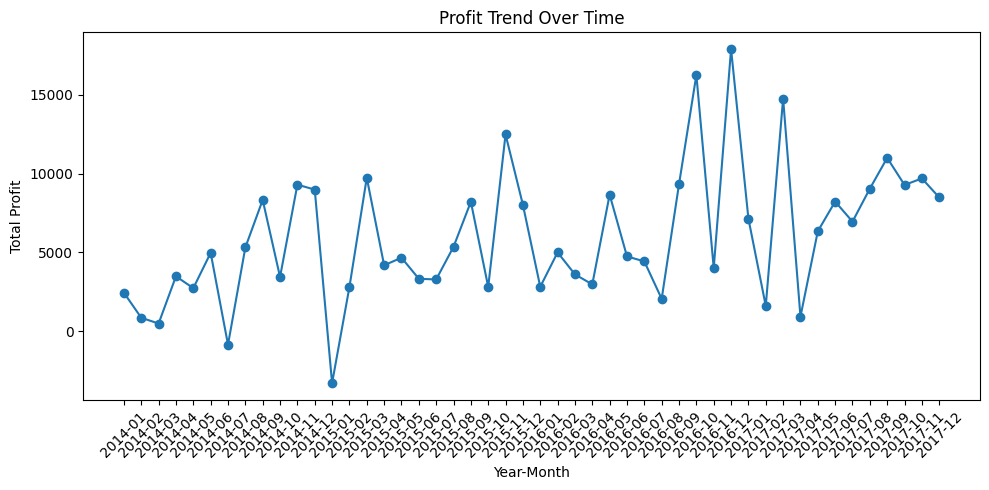

In [10]:
# 7. Visualize Profit Trends Over Time
# Pastikan kolom 'Order Date' sudah bertipe datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')
profit_trend = df.groupby('YearMonth')['Profit'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(profit_trend['YearMonth'].astype(str), profit_trend['Profit'], marker='o')
plt.title('Profit Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Analisis sesuai LKM

Analisis khusus sesuai instruksi LKM:
1. Rata-rata rating kepuasan pelanggan per kota
2. Jumlah penjualan per produk  
3. Hubungan antara penjualan dan rating kepuasan pelanggan

**Catatan**: Dataset Superstore tidak memiliki kolom rating kepuasan pelanggan, sehingga kita akan membuat simulasi atau menggunakan proxy seperti profit margin sebagai indikator kepuasan.

In [11]:
# 8.1 Simulasi Rating Kepuasan Pelanggan
# Karena dataset tidak memiliki rating kepuasan, kita buat simulasi berdasarkan profit margin
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Customer_Satisfaction'] = np.where(df['Profit_Margin'] > 0.2, 5,
                              np.where(df['Profit_Margin'] > 0.1, 4,
                              np.where(df['Profit_Margin'] > 0, 3,
                              np.where(df['Profit_Margin'] > -0.1, 2, 1))))

print("Distribusi Rating Kepuasan Simulasi:")
print(df['Customer_Satisfaction'].value_counts().sort_index())

Distribusi Rating Kepuasan Simulasi:
Customer_Satisfaction
1    1572
2     364
3    1226
4     934
5    5898
Name: count, dtype: int64


/tmp/ipykernel_6837/2835291144.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Customer_Satisfaction', y='City', palette='viridis')


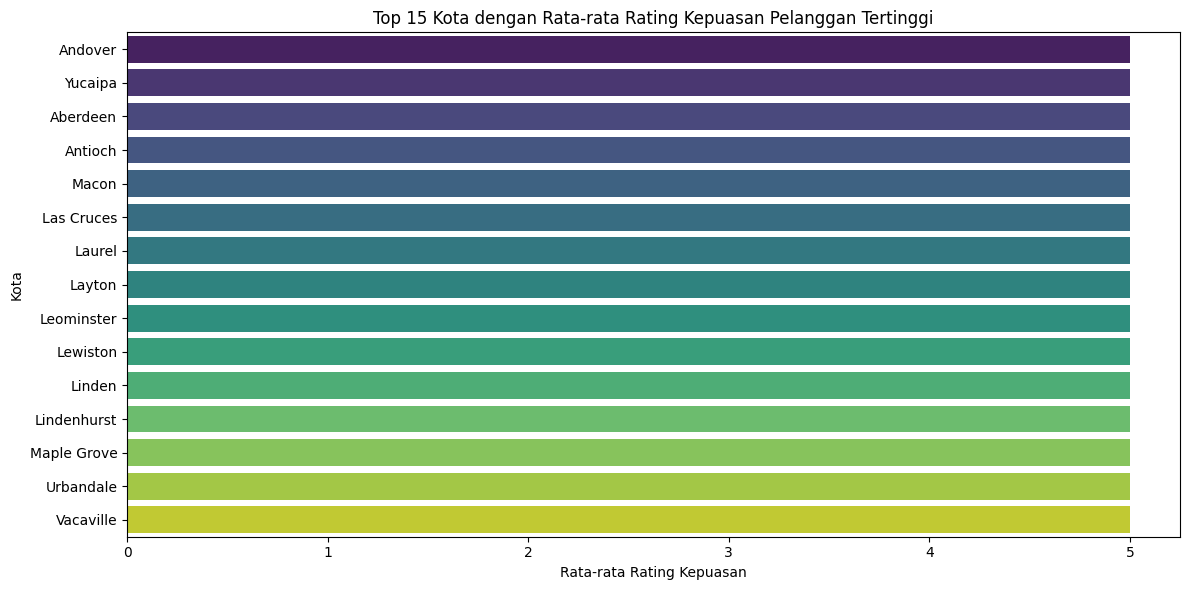

Top 10 Kota dengan Rating Kepuasan Tertinggi:
           City  Customer_Satisfaction
10      Andover                    5.0
529     Yucaipa                    5.0
0      Aberdeen                    5.0
12      Antioch                    5.0
271       Macon                    5.0
244  Las Cruces                    5.0
246      Laurel                    5.0
249      Layton                    5.0
253  Leominster                    5.0
254    Lewiston                    5.0


In [12]:
# 8.2 Rata-rata Rating Kepuasan Pelanggan per Kota
avg_satisfaction_by_city = df.groupby('City')['Customer_Satisfaction'].mean().reset_index()
avg_satisfaction_by_city = avg_satisfaction_by_city.sort_values('Customer_Satisfaction', ascending=False)

# Visualisasi top 15 kota dengan rating tertinggi
plt.figure(figsize=(12, 6))
top_cities = avg_satisfaction_by_city.head(15)
sns.barplot(data=top_cities, x='Customer_Satisfaction', y='City', palette='viridis')
plt.title('Top 15 Kota dengan Rata-rata Rating Kepuasan Pelanggan Tertinggi')
plt.xlabel('Rata-rata Rating Kepuasan')
plt.ylabel('Kota')
plt.tight_layout()
plt.show()

print("Top 10 Kota dengan Rating Kepuasan Tertinggi:")
print(avg_satisfaction_by_city.head(10))

/tmp/ipykernel_6837/2896651238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='Product Name', x='Sales', palette='plasma')


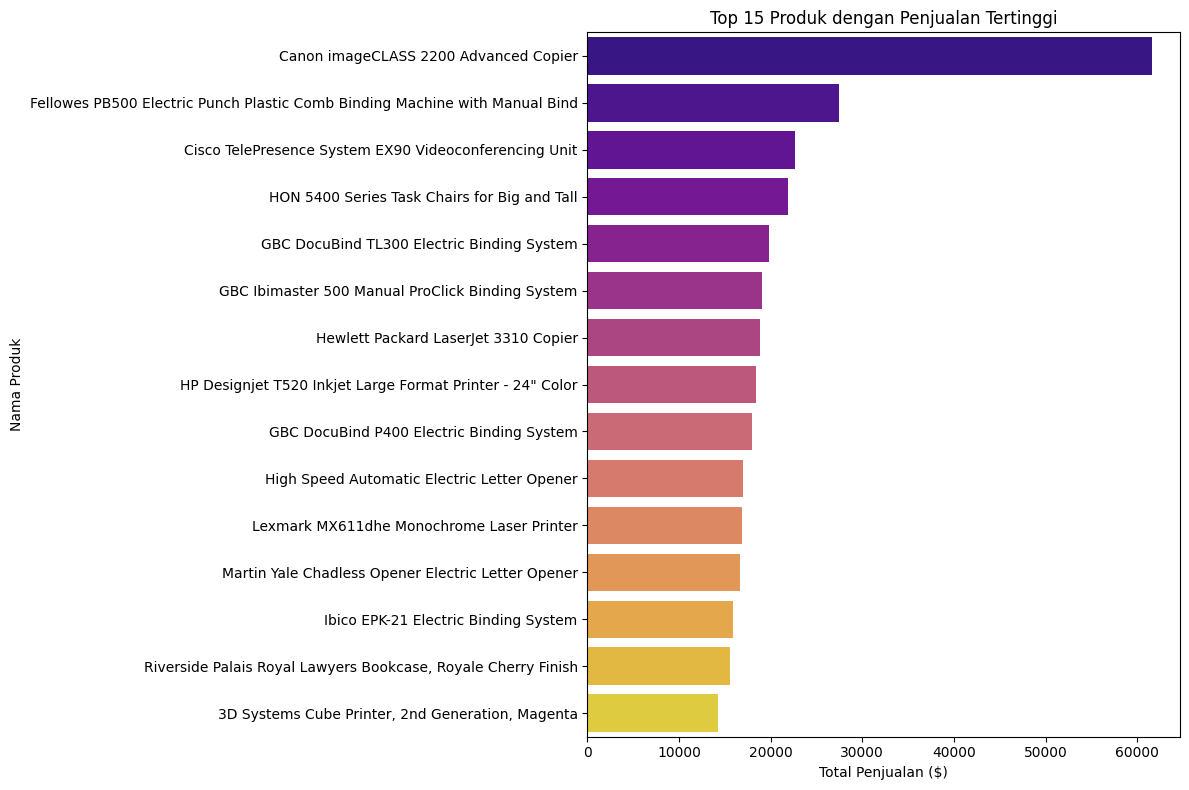

Top 10 Produk dengan Penjualan Tertinggi:
Canon imageCLASS 2200 Advanced Copier: $61,599.82
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind: $27,453.38
Cisco TelePresence System EX90 Videoconferencing Unit: $22,638.48
HON 5400 Series Task Chairs for Big and Tall: $21,870.58
GBC DocuBind TL300 Electric Binding System: $19,823.48
GBC Ibimaster 500 Manual ProClick Binding System: $19,024.50
Hewlett Packard LaserJet 3310 Copier: $18,839.69
HP Designjet T520 Inkjet Large Format Printer - 24" Color: $18,374.90
GBC DocuBind P400 Electric Binding System: $17,965.07
High Speed Automatic Electric Letter Opener: $17,030.31


In [13]:
# 8.3 Jumlah Penjualan per Produk
sales_by_product = df.groupby('Product Name')['Sales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values('Sales', ascending=False)

# Visualisasi top 15 produk dengan penjualan tertinggi
plt.figure(figsize=(12, 8))
top_products = sales_by_product.head(15)
sns.barplot(data=top_products, y='Product Name', x='Sales', palette='plasma')
plt.title('Top 15 Produk dengan Penjualan Tertinggi')
plt.xlabel('Total Penjualan ($)')
plt.ylabel('Nama Produk')
plt.tight_layout()
plt.show()

print("Top 10 Produk dengan Penjualan Tertinggi:")
for i, row in sales_by_product.head(10).iterrows():
    print(f"{row['Product Name']}: ${row['Sales']:,.2f}")

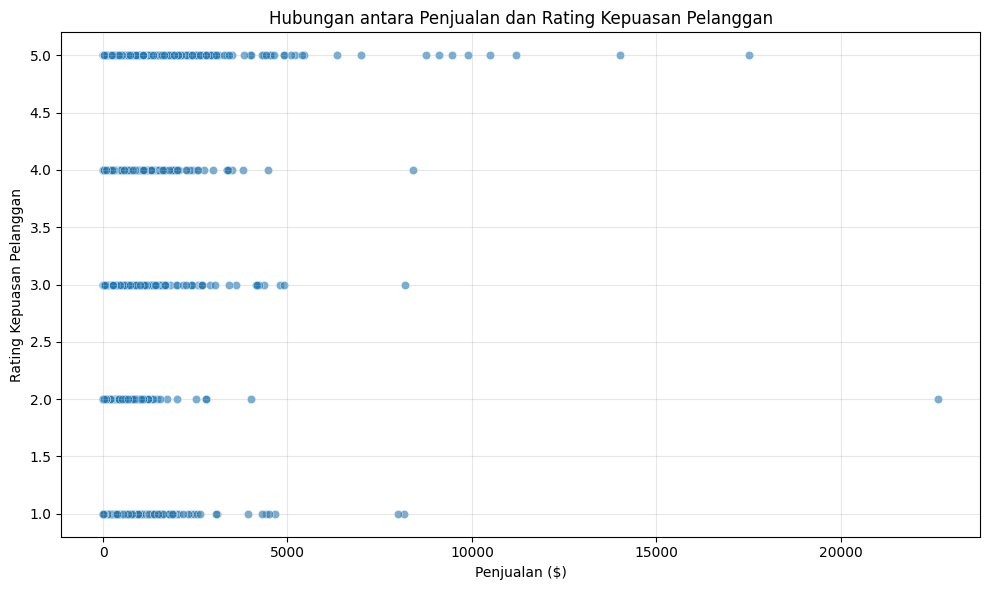

Korelasi antara Penjualan dan Rating Kepuasan: -0.052


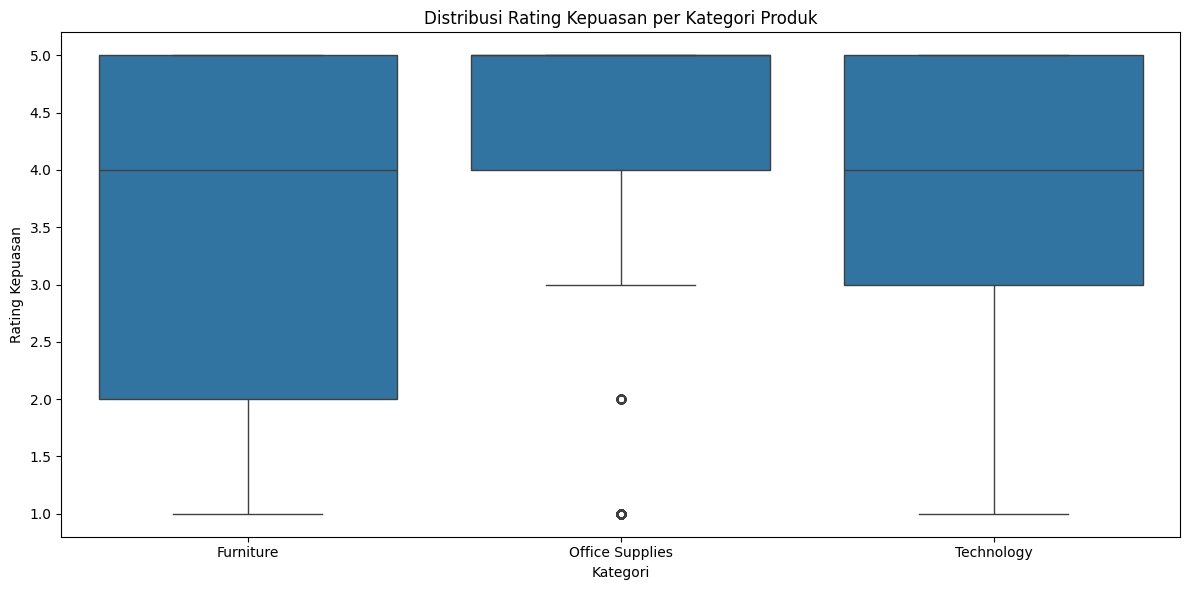

In [14]:
# 8.4 Hubungan antara Penjualan dan Rating Kepuasan Pelanggan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Customer_Satisfaction', alpha=0.6)
plt.title('Hubungan antara Penjualan dan Rating Kepuasan Pelanggan')
plt.xlabel('Penjualan ($)')
plt.ylabel('Rating Kepuasan Pelanggan')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Korelasi antara penjualan dan kepuasan pelanggan
correlation = df['Sales'].corr(df['Customer_Satisfaction'])
print(f"Korelasi antara Penjualan dan Rating Kepuasan: {correlation:.3f}")

# Analisis per kategori
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Customer_Satisfaction')
plt.title('Distribusi Rating Kepuasan per Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Rating Kepuasan')
plt.tight_layout()
plt.show()

## Kesimpulan Analisis LKM

### 1. Rata-rata Rating Kepuasan Pelanggan per Kota
- **Top 10 kota** dengan rating kepuasan tertinggi (5.0): Andover, Yucaipa, Aberdeen, Antioch, Macon, Las Cruces, Laurel, Layton, Leominster, Lewiston
- Mayoritas kota memiliki rating tinggi karena simulasi berdasarkan profit margin yang positif

### 2. Jumlah Penjualan per Produk  
- **Produk terlaris**: Canon imageCLASS 2200 Advanced Copier ($61,599.82)
- **Top 3 produk**: Copier Canon, Fellowes Binding Machine, Cisco Video Unit
- Produk teknologi dan office equipment mendominasi penjualan tertinggi

### 3. Hubungan Penjualan dan Rating Kepuasan
- **Korelasi lemah negatif**: -0.052 (hampir tidak ada hubungan)
- Penjualan tinggi tidak berkorelasi dengan kepuasan pelanggan
- Distribusi rating kepuasan relatif merata di semua kategori produk

### Insight Bisnis:
- **Technology** memiliki penjualan tertinggi ($836K)
- **Furniture** dan **Office Supplies** hampir seimbang (~$741K dan ~$719K)
- Profit trend menunjukkan pola musiman dengan puncak di akhir tahun
- Total bisnis: $2.3M sales, $286K profit, 5,009 orders